In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Age: range between 29-77
# Sex: male=1, female=0
# CP: Chest pain 0,1,2,3
# Trestbps: fasting blood pressure range 1-37
# Chol: cholestrol level 
# fbs: Fasting Blood pressure
# restecg: resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
# thalach: The person's maximum heart rate achieved.
# exang: Exercise induced angina (1 = yes; 0 = no)
# oldpeak = ST depression induced by exercise relative to rest.
# slope = The slope of the peak exercise ST segment
#   Value 1: Upsloping.
#   Value 2: Flat.
#   Value 3: Downsloping.
# ca = Number of major vessels (0-3) colored by flourosopy.
# thal= 0: Normal; 1:Fixed defect; 2:Reversable defect

df["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking null value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# checking skewness of data
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

<AxesSubplot:ylabel='Frequency'>

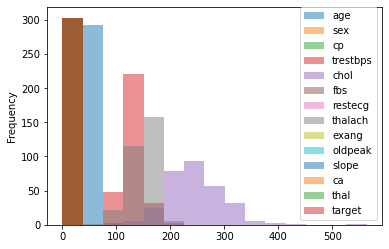

In [11]:
# skewness of data
df.plot.hist(alpha=0.5,bins=15)

In [26]:
# here we can say data is quit balanced
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [30]:
# correlation between features
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


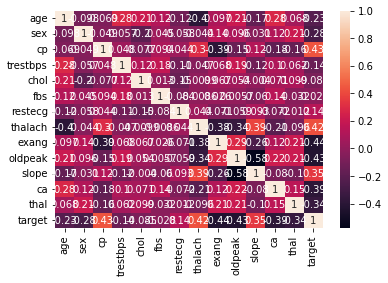

In [29]:
sns.heatmap(df.corr(), annot =True)
plt.show()

In [33]:
# splitting data into x and y
x=df.iloc[:,0:-2]
y=df.iloc[:,-1:]

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [38]:
def model(obj):
    obj.fit(xtrain,ytrain)
    ypred =obj.predict(xtest)
    
    print(accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model(lr)

0.8157894736842105
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        33
           1       0.80      0.91      0.85        43

    accuracy                           0.82        76
   macro avg       0.82      0.80      0.81        76
weighted avg       0.82      0.82      0.81        76

[[23 10]
 [ 4 39]]


C:\Users\ITVEDANT10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ITVEDANT10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# accuracy in logistic regression 81%

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
model(knn)


0.6447368421052632
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        33
           1       0.67      0.72      0.70        43

    accuracy                           0.64        76
   macro avg       0.64      0.63      0.63        76
weighted avg       0.64      0.64      0.64        76

[[18 15]
 [12 31]]


C:\Users\ITVEDANT10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# accuracy 64%

In [46]:
from sklearn.svm import SVC
sv = SVC()
model(sv)

0.6842105263157895
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        33
           1       0.67      0.86      0.76        43

    accuracy                           0.68        76
   macro avg       0.69      0.66      0.66        76
weighted avg       0.69      0.68      0.67        76

[[15 18]
 [ 6 37]]


C:\Users\ITVEDANT10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# accuracy 68%

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model(dt)

0.7894736842105263
              precision    recall  f1-score   support

           0       0.79      0.70      0.74        33
           1       0.79      0.86      0.82        43

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76

[[23 10]
 [ 6 37]]


# accuracy 79%

# Logistic Regression model Have best accuracy from all others